**Komal Mahesh Chitnis**

**Moodle Id: 20102068**

**Subject: Deep Learning**

**Experiment No. 05**

**To implement backpropagation using the Keras library.**


In [2]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv('/content/drive/MyDrive/placementdataset.csv')

In [5]:
df.head()

,CGPA,Profile_Score,Placed
0,8.5,9.0,1
1,7.8,8.2,1
2,9.3,9.5,1
3,6.9,7.1,0
4,7.2,6.8,0


In [6]:
df.shape

(100, 3)

In [7]:
df.duplicated().sum()

7

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(93, 3)

In [11]:
X = df[['CGPA', 'Profile_Score']]
Y = df[['Placed']]

In [12]:
X

,CGPA,Profile_Score
0,8.5,9.0
1,7.8,8.2
2,9.3,9.5
3,6.9,7.1
4,7.2,6.8
...,...,...
94,5.5,5.7
95,7.3,7.0
96,7.8,8.1
97,5.4,5.6


In [13]:
Y

,Placed
0,1
1,1
2,1
3,0
4,0
...,...
94,0
95,0
96,1
97,0


In [14]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.get_weights()

[array([[ 0.2558055 , -0.00517392, -0.6068382 ,  0.1281383 ],
        [-0.616061  , -0.41293097,  0.01912618, -0.87138605]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.45425954, -0.37949872, -0.85665053, -0.44299728],
        [-0.16405427,  0.54058367,  0.8571934 ,  0.83807963],
        [-0.29991752, -0.32164216, -0.8263092 ,  0.06612742],
        [-0.8160659 ,  0.14506215,  0.44490033, -0.20175856]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.5810325 ],
        [-0.6226666 ],
        [ 0.6775305 ],
        [-0.25321466]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X, Y, epochs=100, batch_size = 1, verbose = 1)

Epoch 1/100
93/93 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5699
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5806
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5806
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5806
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5806
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5806
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5806
Epoch 8/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5806
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5806
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5806
Epoch 11/

In [20]:
loss, accuracy = model.evaluate(X, Y)
print(f'Loss:{loss}, Accuracy:{accuracy}')

3/3 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5806
Loss:0.6800844073295593, Accuracy:0.5806451439857483


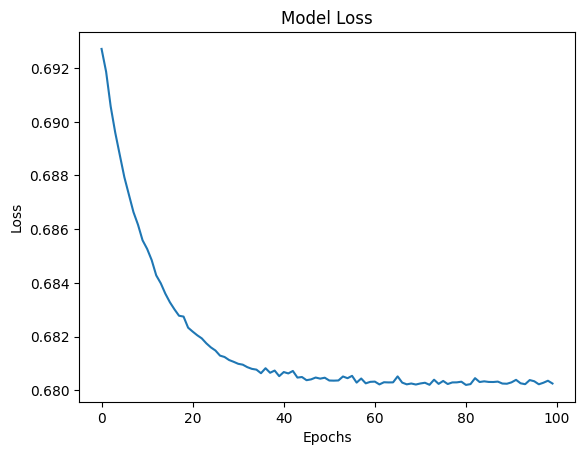

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

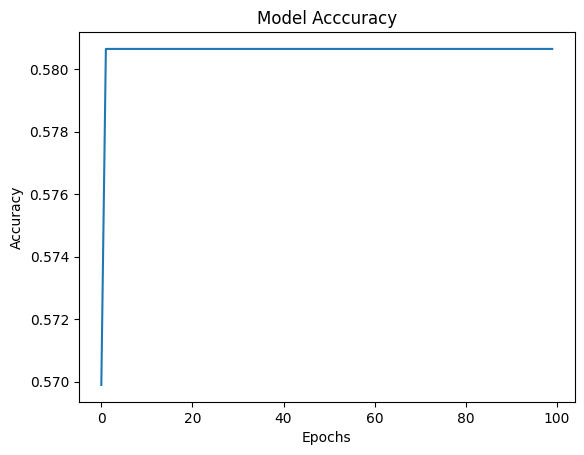

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Acccuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [25]:
import numpy as np
new_data = np.array([[8.1, 6.1]])
prediction = model.predict(new_data)

1/1 [==============================] - 0s 88ms/step


In [26]:
prediction

array([[0.5797905]], dtype=float32)

In [27]:
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)

Prediction: [[1]]
